Author: Laura Saldarriaga Higuita

Mail: laura.saldarriagah@gmail.com

## Import libraries

In [1]:
import re

import pandas as pd
import numpy as np
from datetime import datetime

import matplotlib.pyplot as plt

from datetime import datetime, timedelta

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

## Import dataset

In [2]:
order_data = pd.read_excel('./order_data.xlsx')

## Data description

In [3]:
order_data.head()

,ENTRY_DATE,DELIVERY_DATE,CUSTOMER_RANK,CUSTOMER_NUMBER,HOSPITAL_LOCATION_ID,DELIVERY_WAREHOUSE,PRODUCT_NUMBER,ORIGINAL_QUANTITY,ORDER_QUANTITY,DELIVERY_QUANTITY,...,ORDER_LINE_ITEM_TOTAL,DELIVERY_LINE_ITEM_TOTAL,AMOUNT_LOST,UPDATE_FLAG,REGION,AREA,DISTRICT,CLIENT_AREA,CLIENT_DISTRICT,REASON_CODE
0,2022-11-17,2023-03-23,G,881900,56245,305,319195,2,2,2,...,125.60,125.60,0.00,C,X-Medical Operations Europe,X11-N. Europe,739-Holland,K50-Germany & East Europe,489-East Europe,
1,2022-11-17,2023-03-23,G,881900,56245,305,367012,3,2,2,...,918.46,612.31,306.15,C,X-Medical Operations Europe,X11-N. Europe,739-Holland,K50-Germany & East Europe,489-East Europe,64-Customer change to product or QTY
2,2022-11-17,2023-03-23,G,881900,56245,305,373019,1,1,1,...,295.77,295.77,0.00,C,X-Medical Operations Europe,X11-N. Europe,739-Holland,K50-Germany & East Europe,489-East Europe,
3,2023-01-27,2023-02-28,G,-881900,-43952,-305,-548026,-1,-1,-1,...,617.05,617.05,0.00,C,X-Medical Operations Europe,X11-N. Europe,739-Holland,K50-Germany & East Europe,489-East Europe,
4,2023-01-27,2023-02-28,G,-881900,-43952,-305,-549024,-1,-1,-1,...,617.05,617.05,0.00,C,X-Medical Operations Europe,X11-N. Europe,739-Holland,K50-Germany & East Europe,489-East Europe,


In [4]:
order_data.shape

(68900, 24)

In [5]:
order_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68900 entries, 0 to 68899
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   ENTRY_DATE                68900 non-null  datetime64[ns]
 1   DELIVERY_DATE             68900 non-null  datetime64[ns]
 2   CUSTOMER_RANK             68900 non-null  object        
 3   CUSTOMER_NUMBER           68900 non-null  int64         
 4   HOSPITAL_LOCATION_ID      68900 non-null  object        
 5   DELIVERY_WAREHOUSE        68900 non-null  int64         
 6   PRODUCT_NUMBER            68900 non-null  object        
 7   ORIGINAL_QUANTITY         68900 non-null  object        
 8   ORDER_QUANTITY            68900 non-null  int64         
 9   DELIVERY_QUANTITY         68900 non-null  int64         
 10  LINE_SEQUENCE             68900 non-null  int64         
 11  TRACKING_NUMBER           68900 non-null  object        
 12  SERVICE_ORDER_NUMB

In [6]:
order_data.describe()

,ENTRY_DATE,DELIVERY_DATE,CUSTOMER_NUMBER,DELIVERY_WAREHOUSE,ORDER_QUANTITY,DELIVERY_QUANTITY,LINE_SEQUENCE,SERVICE_LEVEL_STATUS,ORDER_LINE_ITEM_TOTAL,DELIVERY_LINE_ITEM_TOTAL,AMOUNT_LOST
count,68900,68900,6.890000e+04,68900.000000,68900.000000,68900.000000,68900.000000,68900.000000,68900.000000,68900.000000,68900.000000
mean,2023-01-24 15:36:12.539912960,2023-02-15 14:59:36.801160704,-1.574042e+07,-235.682163,-3.460929,-3.117968,-5.610943,-0.549463,705.818428,524.964379,180.854069
min,2021-01-15 00:00:00,2023-01-01 00:00:00,-9.130750e+07,-5027.000000,-30000.000000,-30000.000000,-363.000000,-1.000000,-3588.470000,0.000000,-36748.780000
25%,2023-01-09 00:00:00,2023-01-25 00:00:00,-2.563688e+07,-595.000000,-4.000000,-3.000000,-9.000000,-1.000000,116.600000,52.015000,0.000000
50%,2023-01-30 00:00:00,2023-02-16 00:00:00,-7.708900e+06,-297.000000,-2.000000,-1.000000,-4.000000,-1.000000,279.000000,207.000000,0.000000
75%,2023-02-21 00:00:00,2023-03-09 00:00:00,-3.265810e+06,-106.000000,-1.000000,0.000000,-1.000000,0.000000,634.525000,481.575000,0.000000
max,2023-03-31 00:00:00,2023-03-31 00:00:00,8.997286e+07,5021.000000,5000.000000,5000.000000,335.000000,1.000000,116713.200000,116713.200000,100594.910000
std,NaN,NaN,3.520809e+07,438.082085,172.335945,171.836607,24.442765,0.750355,2107.655864,1678.156617,1282.737793


### Understand differences in data bewteen 2022 and 2023

#### Read 2022 or previous data

In [7]:
order_data_2022 = order_data[order_data['ENTRY_DATE']<'2023-01-01']
order_data_2022.head()

,ENTRY_DATE,DELIVERY_DATE,CUSTOMER_RANK,CUSTOMER_NUMBER,HOSPITAL_LOCATION_ID,DELIVERY_WAREHOUSE,PRODUCT_NUMBER,ORIGINAL_QUANTITY,ORDER_QUANTITY,DELIVERY_QUANTITY,...,ORDER_LINE_ITEM_TOTAL,DELIVERY_LINE_ITEM_TOTAL,AMOUNT_LOST,UPDATE_FLAG,REGION,AREA,DISTRICT,CLIENT_AREA,CLIENT_DISTRICT,REASON_CODE
0,2022-11-17,2023-03-23,G,881900,56245,305,319195,2,2,2,...,125.60,125.60,0.00,C,X-Medical Operations Europe,X11-N. Europe,739-Holland,K50-Germany & East Europe,489-East Europe,
1,2022-11-17,2023-03-23,G,881900,56245,305,367012,3,2,2,...,918.46,612.31,306.15,C,X-Medical Operations Europe,X11-N. Europe,739-Holland,K50-Germany & East Europe,489-East Europe,64-Customer change to product or QTY
2,2022-11-17,2023-03-23,G,881900,56245,305,373019,1,1,1,...,295.77,295.77,0.00,C,X-Medical Operations Europe,X11-N. Europe,739-Holland,K50-Germany & East Europe,489-East Europe,
256,2022-12-08,2023-03-27,G,2375900,41081,393,24406,1,1,1,...,35.75,35.75,0.00,C,X-Medical Operations Europe,X10-S. Europe,789-Spain,K50-Germany & East Europe,490-Germany,
257,2022-12-08,2023-03-27,G,2375900,41081,393,48406,2,2,2,...,142.50,142.50,0.00,C,X-Medical Operations Europe,X10-S. Europe,789-Spain,K50-Germany & East Europe,490-Germany,


#### Check PRODUCT_NUMBER column

In [8]:
order_data_2022['PRODUCT_NUMBER'].unique()

array([319195, 367012, 373019, 24406, 48406, 91488, 387028, 387036,
       1240407, ' 1AB2733', ' 1AB2735', ' 1AB2919', 4520400, 5482401,
       5483409, 6598405, 6623400, 8717714, 8720790, 9511404, 14407, 97403,
       369026, 388018, ' 1AA0003', ' 1AA0004', 34421, 45626, 62349, 82404,
       5406, 8400, 173062, 225012, 246034, 246117, 369018, 1402403,
       374025, 378019, 417015, ' 1AA0016', 6444095, ' 1AB1973', 4064408,
       ' 1AB2328', 8720774, 34405, 309170, 355017, 365016, 201020,
       2256106, 162016, ' 1AA3399', 799207, 4608404, 548026, 549024,
       571019, 716011, 717019, 725012, 782020, ' 1AA8061', 2206010,
       ' 1AB2739', ' 1AA7921', ' 1AA7922', ' 1AA7923', ' 1AA7924',
       ' 1AA7925', ' 1AB6185', 173054, 232025, 247016, 311019, 313197,
       504010, 505018, 508012, 511015, 546012, 547010, 41400, 57407,
       319096, 829012, 846016, 3029395, 6968020, 4139409, 4757409,
       6675401, 9076036, 129503, 129511, 523010, 541012, 542010, 543018,
       11403, 60400,

In [9]:
order_data_2022['PRODUCT_NUMBER'].nunique()

714

#### Remove spaces before the ID

In [10]:
order_data_2022['PRODUCT_NUMBER']  = [re.sub(r'[\s]', '', item) if isinstance(item, str) and ' ' in item else item for item in order_data_2022['PRODUCT_NUMBER'] ]
order_data_2022.head()

/var/folders/4z/_zp620rd3w915xf6z_j1jql80000gn/T/ipykernel_16065/305580844.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  order_data_2022['PRODUCT_NUMBER']  = [re.sub(r'[\s]', '', item) if isinstance(item, str) and ' ' in item else item for item in order_data_2022['PRODUCT_NUMBER'] ]


,ENTRY_DATE,DELIVERY_DATE,CUSTOMER_RANK,CUSTOMER_NUMBER,HOSPITAL_LOCATION_ID,DELIVERY_WAREHOUSE,PRODUCT_NUMBER,ORIGINAL_QUANTITY,ORDER_QUANTITY,DELIVERY_QUANTITY,...,ORDER_LINE_ITEM_TOTAL,DELIVERY_LINE_ITEM_TOTAL,AMOUNT_LOST,UPDATE_FLAG,REGION,AREA,DISTRICT,CLIENT_AREA,CLIENT_DISTRICT,REASON_CODE
0,2022-11-17,2023-03-23,G,881900,56245,305,319195,2,2,2,...,125.60,125.60,0.00,C,X-Medical Operations Europe,X11-N. Europe,739-Holland,K50-Germany & East Europe,489-East Europe,
1,2022-11-17,2023-03-23,G,881900,56245,305,367012,3,2,2,...,918.46,612.31,306.15,C,X-Medical Operations Europe,X11-N. Europe,739-Holland,K50-Germany & East Europe,489-East Europe,64-Customer change to product or QTY
2,2022-11-17,2023-03-23,G,881900,56245,305,373019,1,1,1,...,295.77,295.77,0.00,C,X-Medical Operations Europe,X11-N. Europe,739-Holland,K50-Germany & East Europe,489-East Europe,
256,2022-12-08,2023-03-27,G,2375900,41081,393,24406,1,1,1,...,35.75,35.75,0.00,C,X-Medical Operations Europe,X10-S. Europe,789-Spain,K50-Germany & East Europe,490-Germany,
257,2022-12-08,2023-03-27,G,2375900,41081,393,48406,2,2,2,...,142.50,142.50,0.00,C,X-Medical Operations Europe,X10-S. Europe,789-Spain,K50-Germany & East Europe,490-Germany,


In [11]:
order_data_2022['PRODUCT_NUMBER'].unique()

array([319195, 367012, 373019, 24406, 48406, 91488, 387028, 387036,
       1240407, '1AB2733', '1AB2735', '1AB2919', 4520400, 5482401,
       5483409, 6598405, 6623400, 8717714, 8720790, 9511404, 14407, 97403,
       369026, 388018, '1AA0003', '1AA0004', 34421, 45626, 62349, 82404,
       5406, 8400, 173062, 225012, 246034, 246117, 369018, 1402403,
       374025, 378019, 417015, '1AA0016', 6444095, '1AB1973', 4064408,
       '1AB2328', 8720774, 34405, 309170, 355017, 365016, 201020, 2256106,
       162016, '1AA3399', 799207, 4608404, 548026, 549024, 571019, 716011,
       717019, 725012, 782020, '1AA8061', 2206010, '1AB2739', '1AA7921',
       '1AA7922', '1AA7923', '1AA7924', '1AA7925', '1AB6185', 173054,
       232025, 247016, 311019, 313197, 504010, 505018, 508012, 511015,
       546012, 547010, 41400, 57407, 319096, 829012, 846016, 3029395,
       6968020, 4139409, 4757409, 6675401, 9076036, 129503, 129511,
       523010, 541012, 542010, 543018, 11403, 60400, 7402, 233023,
       '1

#### Read 2023+ data

In [12]:
order_data_2023 = order_data[order_data['ENTRY_DATE']>='2023-01-01']
order_data_2023.head()

,ENTRY_DATE,DELIVERY_DATE,CUSTOMER_RANK,CUSTOMER_NUMBER,HOSPITAL_LOCATION_ID,DELIVERY_WAREHOUSE,PRODUCT_NUMBER,ORIGINAL_QUANTITY,ORDER_QUANTITY,DELIVERY_QUANTITY,...,ORDER_LINE_ITEM_TOTAL,DELIVERY_LINE_ITEM_TOTAL,AMOUNT_LOST,UPDATE_FLAG,REGION,AREA,DISTRICT,CLIENT_AREA,CLIENT_DISTRICT,REASON_CODE
3,2023-01-27,2023-02-28,G,-881900,-43952,-305,-548026,-1,-1,-1,...,617.05,617.05,0.0,C,X-Medical Operations Europe,X11-N. Europe,739-Holland,K50-Germany & East Europe,489-East Europe,
4,2023-01-27,2023-02-28,G,-881900,-43952,-305,-549024,-1,-1,-1,...,617.05,617.05,0.0,C,X-Medical Operations Europe,X11-N. Europe,739-Holland,K50-Germany & East Europe,489-East Europe,
5,2023-03-01,2023-03-08,G,-881900,-47725,-305,-5406,-3,-3,-3,...,408.75,408.75,0.0,C,X-Medical Operations Europe,X11-N. Europe,739-Holland,K50-Germany & East Europe,489-East Europe,
6,2023-03-01,2023-03-08,G,-881900,-47725,-305,-24406,-1,-1,-1,...,85.00,85.00,0.0,C,X-Medical Operations Europe,X11-N. Europe,739-Holland,K50-Germany & East Europe,489-East Europe,
7,2023-03-01,2023-03-08,G,-881900,-47725,-305,-45626,-1,-1,-1,...,141.50,141.50,0.0,C,X-Medical Operations Europe,X11-N. Europe,739-Holland,K50-Germany & East Europe,489-East Europe,


#### Check PRODUCT_NUMBER column

In [13]:
order_data_2023['PRODUCT_NUMBER'].unique()

array([-548026, -549024, -5406, -24406, -45626, -91488, -97403, -5483409,
       -6598405, '( 1AB2919)', -5482401, -8720774, -89400, -504010,
       -505018, -799207, -725012, -829012, -367012, -8717714, -8720790,
       -570094, -3029395, -5985405, '( 1AB3458)', -16403, -48406, -57407,
       -58405, -670993, -62349, -373019, -378019, '( 1AB1973)',
       '( 1AB2328)', '( 1AB2344)', -4064408, -4520400, -4907400, -355017,
       -369018, -369026, -829053, -11403, -387010, -388018, -727018,
       '( 1AA0004)', -14407, -6981402, -224014, -309170, -390021,
       -1676404, -5307401, -1240407, '( 1AB2733)', '( 1AB2735)',
       '( 1AB2739)', -2306422, -5480405, -364018, -365016, -630054,
       -631060, -6623400, -9928013, -9929011, -9930018, -25628, -233023,
       '( 1AA0003)', '( 1AB2691)', -5963336, -6179403, -571019,
       '( 1AB3455)', -2256106, -6968020, -6968038, -846016, -374025,
       -4608404, -562992, '( 1AB5658)', -9511404, -526014, -543018,
       -550013, -551011, -741018

In [14]:
order_data_2023['PRODUCT_NUMBER'].nunique()

918

#### Remove spaces before the ID and parenthesis

In [15]:
order_data_2023['ORIGINAL_QUANTITY']  = [re.sub(r'[()\s]', '', item) if isinstance(item, str) and '(' in item else item for item in order_data_2023['ORIGINAL_QUANTITY'] ]
order_data_2023['PRODUCT_NUMBER']  = [re.sub(r'[()\s]', '', item) if isinstance(item, str) and '(' in item else item for item in order_data_2023['PRODUCT_NUMBER'] ]
order_data_2023.head()

/var/folders/4z/_zp620rd3w915xf6z_j1jql80000gn/T/ipykernel_16065/2596172983.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  order_data_2023['ORIGINAL_QUANTITY']  = [re.sub(r'[()\s]', '', item) if isinstance(item, str) and '(' in item else item for item in order_data_2023['ORIGINAL_QUANTITY'] ]
/var/folders/4z/_zp620rd3w915xf6z_j1jql80000gn/T/ipykernel_16065/2596172983.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  order_data_2023['PRODUCT_NUMBER']  = [re.sub(r'[()\s]', '', item) if isinstance(item,

,ENTRY_DATE,DELIVERY_DATE,CUSTOMER_RANK,CUSTOMER_NUMBER,HOSPITAL_LOCATION_ID,DELIVERY_WAREHOUSE,PRODUCT_NUMBER,ORIGINAL_QUANTITY,ORDER_QUANTITY,DELIVERY_QUANTITY,...,ORDER_LINE_ITEM_TOTAL,DELIVERY_LINE_ITEM_TOTAL,AMOUNT_LOST,UPDATE_FLAG,REGION,AREA,DISTRICT,CLIENT_AREA,CLIENT_DISTRICT,REASON_CODE
3,2023-01-27,2023-02-28,G,-881900,-43952,-305,-548026,-1,-1,-1,...,617.05,617.05,0.0,C,X-Medical Operations Europe,X11-N. Europe,739-Holland,K50-Germany & East Europe,489-East Europe,
4,2023-01-27,2023-02-28,G,-881900,-43952,-305,-549024,-1,-1,-1,...,617.05,617.05,0.0,C,X-Medical Operations Europe,X11-N. Europe,739-Holland,K50-Germany & East Europe,489-East Europe,
5,2023-03-01,2023-03-08,G,-881900,-47725,-305,-5406,-3,-3,-3,...,408.75,408.75,0.0,C,X-Medical Operations Europe,X11-N. Europe,739-Holland,K50-Germany & East Europe,489-East Europe,
6,2023-03-01,2023-03-08,G,-881900,-47725,-305,-24406,-1,-1,-1,...,85.00,85.00,0.0,C,X-Medical Operations Europe,X11-N. Europe,739-Holland,K50-Germany & East Europe,489-East Europe,
7,2023-03-01,2023-03-08,G,-881900,-47725,-305,-45626,-1,-1,-1,...,141.50,141.50,0.0,C,X-Medical Operations Europe,X11-N. Europe,739-Holland,K50-Germany & East Europe,489-East Europe,


In [16]:
order_data_2023['PRODUCT_NUMBER'].unique()

array([-548026, -549024, -5406, -24406, -45626, -91488, -97403, -5483409,
       -6598405, '1AB2919', -5482401, -8720774, -89400, -504010, -505018,
       -799207, -725012, -829012, -367012, -8717714, -8720790, -570094,
       -3029395, -5985405, '1AB3458', -16403, -48406, -57407, -58405,
       -670993, -62349, -373019, -378019, '1AB1973', '1AB2328', '1AB2344',
       -4064408, -4520400, -4907400, -355017, -369018, -369026, -829053,
       -11403, -387010, -388018, -727018, '1AA0004', -14407, -6981402,
       -224014, -309170, -390021, -1676404, -5307401, -1240407, '1AB2733',
       '1AB2735', '1AB2739', -2306422, -5480405, -364018, -365016,
       -630054, -631060, -6623400, -9928013, -9929011, -9930018, -25628,
       -233023, '1AA0003', '1AB2691', -5963336, -6179403, -571019,
       '1AB3455', -2256106, -6968020, -6968038, -846016, -374025,
       -4608404, -562992, '1AB5658', -9511404, -526014, -543018, -550013,
       -551011, -741018, -829004, -41400, -6979407, -98401, -658031,


#### Turn negative PRODUCT_NUMBER values into positive to make it comparable with 2022 data

In [17]:
def convert_to_positive(value):
    if isinstance(value, (int, float)) and value < 0:
        return -value
    return value

order_data_2023['PRODUCT_NUMBER'] = order_data_2023['PRODUCT_NUMBER'].apply(convert_to_positive)

/var/folders/4z/_zp620rd3w915xf6z_j1jql80000gn/T/ipykernel_16065/104062752.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  order_data_2023['PRODUCT_NUMBER'] = order_data_2023['PRODUCT_NUMBER'].apply(convert_to_positive)


In [18]:
order_data_2023['PRODUCT_NUMBER'].unique()

array([548026, 549024, 5406, 24406, 45626, 91488, 97403, 5483409, 6598405,
       '1AB2919', 5482401, 8720774, 89400, 504010, 505018, 799207, 725012,
       829012, 367012, 8717714, 8720790, 570094, 3029395, 5985405,
       '1AB3458', 16403, 48406, 57407, 58405, 670993, 62349, 373019,
       378019, '1AB1973', '1AB2328', '1AB2344', 4064408, 4520400, 4907400,
       355017, 369018, 369026, 829053, 11403, 387010, 388018, 727018,
       '1AA0004', 14407, 6981402, 224014, 309170, 390021, 1676404,
       5307401, 1240407, '1AB2733', '1AB2735', '1AB2739', 2306422,
       5480405, 364018, 365016, 630054, 631060, 6623400, 9928013, 9929011,
       9930018, 25628, 233023, '1AA0003', '1AB2691', 5963336, 6179403,
       571019, '1AB3455', 2256106, 6968020, 6968038, 846016, 374025,
       4608404, 562992, '1AB5658', 9511404, 526014, 543018, 550013,
       551011, 741018, 829004, 41400, 6979407, 98401, 658031, 552019,
       553017, 602012, 613019, 614017, 617011, 684051, 705014, '1AB2834',
       8

In [19]:
order_data_2023.columns

Index(['ENTRY_DATE', 'DELIVERY_DATE', 'CUSTOMER_RANK', 'CUSTOMER_NUMBER',
       'HOSPITAL_LOCATION_ID', 'DELIVERY_WAREHOUSE', 'PRODUCT_NUMBER',
       'ORIGINAL_QUANTITY', 'ORDER_QUANTITY', 'DELIVERY_QUANTITY',
       'LINE_SEQUENCE', 'TRACKING_NUMBER', 'SERVICE_ORDER_NUMBER',
       'SERVICE_LEVEL_STATUS', 'ORDER_LINE_ITEM_TOTAL',
       'DELIVERY_LINE_ITEM_TOTAL', 'AMOUNT_LOST', 'UPDATE_FLAG', 'REGION',
       'AREA', 'DISTRICT', 'CLIENT_AREA', 'CLIENT_DISTRICT', 'REASON_CODE'],
      dtype='object')

#### Check unique values for each column to see which columns need to be turned into positive values

In [20]:
unique_values = {col: order_data_2023[col].unique() for col in order_data_2023.columns}
unique_values

{'ENTRY_DATE': <DatetimeArray>
 ['2023-01-27 00:00:00', '2023-03-01 00:00:00', '2023-02-09 00:00:00',
  '2023-03-09 00:00:00', '2023-03-08 00:00:00', '2023-02-27 00:00:00',
  '2023-01-03 00:00:00', '2023-02-14 00:00:00', '2023-02-24 00:00:00',
  '2023-02-17 00:00:00', '2023-03-06 00:00:00', '2023-03-05 00:00:00',
  '2023-03-14 00:00:00', '2023-03-02 00:00:00', '2023-03-21 00:00:00',
  '2023-03-15 00:00:00', '2023-03-20 00:00:00', '2023-03-28 00:00:00',
  '2023-02-03 00:00:00', '2023-03-16 00:00:00', '2023-03-27 00:00:00',
  '2023-03-13 00:00:00', '2023-03-24 00:00:00', '2023-02-20 00:00:00',
  '2023-03-17 00:00:00', '2023-01-29 00:00:00', '2023-03-10 00:00:00',
  '2023-03-26 00:00:00', '2023-02-21 00:00:00', '2023-02-28 00:00:00',
  '2023-03-29 00:00:00', '2023-03-23 00:00:00', '2023-03-25 00:00:00',
  '2023-03-03 00:00:00', '2023-03-07 00:00:00', '2023-03-22 00:00:00',
  '2023-02-12 00:00:00', '2023-02-02 00:00:00', '2023-01-05 00:00:00',
  '2023-02-07 00:00:00', '2023-02-15 00:00:00'

In [21]:
order_data_2023['HOSPITAL_LOCATION_ID'].unique()

array([-43952, -47725, -47930, ..., -51735, -55793, -54594], dtype=object)

#### Take numeric columns to be positive

In [22]:
numeric_columns = ['ORIGINAL_QUANTITY', 'CUSTOMER_NUMBER',  'LINE_SEQUENCE', 'HOSPITAL_LOCATION_ID','DELIVERY_WAREHOUSE',
       'ORIGINAL_QUANTITY', 'ORDER_QUANTITY', 'DELIVERY_QUANTITY']

# Multiply negative values by -1 for the specified columns
for col in numeric_columns:
    #print(col)
    order_data_2023['ORIGINAL_QUANTITY'] = pd.to_numeric(order_data_2023['ORIGINAL_QUANTITY'], errors='coerce')
    order_data_2023['HOSPITAL_LOCATION_ID'] = pd.to_numeric(order_data_2023['HOSPITAL_LOCATION_ID'], errors='coerce')
    order_data_2023['AMOUNT_LOST'] = pd.to_numeric(order_data_2023['AMOUNT_LOST'], errors='coerce')
    order_data_2023[col] = order_data_2023[col].apply(lambda x: -x if x < 0 else x)

# Display some rows to verify the adjustment
order_data_2023.head()

/var/folders/4z/_zp620rd3w915xf6z_j1jql80000gn/T/ipykernel_16065/2998999989.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  order_data_2023['ORIGINAL_QUANTITY'] = pd.to_numeric(order_data_2023['ORIGINAL_QUANTITY'], errors='coerce')
/var/folders/4z/_zp620rd3w915xf6z_j1jql80000gn/T/ipykernel_16065/2998999989.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  order_data_2023['HOSPITAL_LOCATION_ID'] = pd.to_numeric(order_data_2023['HOSPITAL_LOCATION_ID'], errors='coerce')
/var/folders/4z/_zp620rd3w915xf6z_

,ENTRY_DATE,DELIVERY_DATE,CUSTOMER_RANK,CUSTOMER_NUMBER,HOSPITAL_LOCATION_ID,DELIVERY_WAREHOUSE,PRODUCT_NUMBER,ORIGINAL_QUANTITY,ORDER_QUANTITY,DELIVERY_QUANTITY,...,ORDER_LINE_ITEM_TOTAL,DELIVERY_LINE_ITEM_TOTAL,AMOUNT_LOST,UPDATE_FLAG,REGION,AREA,DISTRICT,CLIENT_AREA,CLIENT_DISTRICT,REASON_CODE
3,2023-01-27,2023-02-28,G,881900,43952.0,305,548026,1.0,1,1,...,617.05,617.05,0.0,C,X-Medical Operations Europe,X11-N. Europe,739-Holland,K50-Germany & East Europe,489-East Europe,
4,2023-01-27,2023-02-28,G,881900,43952.0,305,549024,1.0,1,1,...,617.05,617.05,0.0,C,X-Medical Operations Europe,X11-N. Europe,739-Holland,K50-Germany & East Europe,489-East Europe,
5,2023-03-01,2023-03-08,G,881900,47725.0,305,5406,3.0,3,3,...,408.75,408.75,0.0,C,X-Medical Operations Europe,X11-N. Europe,739-Holland,K50-Germany & East Europe,489-East Europe,
6,2023-03-01,2023-03-08,G,881900,47725.0,305,24406,1.0,1,1,...,85.00,85.00,0.0,C,X-Medical Operations Europe,X11-N. Europe,739-Holland,K50-Germany & East Europe,489-East Europe,
7,2023-03-01,2023-03-08,G,881900,47725.0,305,45626,1.0,1,1,...,141.50,141.50,0.0,C,X-Medical Operations Europe,X11-N. Europe,739-Holland,K50-Germany & East Europe,489-East Europe,


#### Check if after turning PRODUCT_NUMBER into positive values, there are common products between 2022 and 2023 and decide if the conversion to positive makes sense

In [23]:
unique_2022 = set(order_data_2022['PRODUCT_NUMBER'].unique())
unique_2023 = set(order_data_2023['PRODUCT_NUMBER'].unique())

# Find common values
common_values = unique_2022.intersection(unique_2023)

len(common_values)

604

**There are 604 common products, so the homologation for product numbers makes sense**

#### Concatenate 2022 (and before) and 2023+ data

In [24]:
order_data_2021_2023 = pd.concat([order_data_2022, order_data_2023])
order_data_2021_2023.shape

(68900, 24)

#### Add fulfilled column
1 - Fulfilled
0 - Unfulfilled

In [25]:
order_data_2021_2023['FULFILLED'] = (order_data_2021_2023['DELIVERY_QUANTITY'] >= order_data_2021_2023['ORDER_QUANTITY']).astype(int)

In [26]:
order_data_2021_2023.head(20)

,ENTRY_DATE,DELIVERY_DATE,CUSTOMER_RANK,CUSTOMER_NUMBER,HOSPITAL_LOCATION_ID,DELIVERY_WAREHOUSE,PRODUCT_NUMBER,ORIGINAL_QUANTITY,ORDER_QUANTITY,DELIVERY_QUANTITY,...,DELIVERY_LINE_ITEM_TOTAL,AMOUNT_LOST,UPDATE_FLAG,REGION,AREA,DISTRICT,CLIENT_AREA,CLIENT_DISTRICT,REASON_CODE,FULFILLED
0,2022-11-17,2023-03-23,G,881900,56245,305,319195,2,2,2,...,125.60,0.00,C,X-Medical Operations Europe,X11-N. Europe,739-Holland,K50-Germany & East Europe,489-East Europe,,1
1,2022-11-17,2023-03-23,G,881900,56245,305,367012,3,2,2,...,612.31,306.15,C,X-Medical Operations Europe,X11-N. Europe,739-Holland,K50-Germany & East Europe,489-East Europe,64-Customer change to product or QTY,1
2,2022-11-17,2023-03-23,G,881900,56245,305,373019,1,1,1,...,295.77,0.00,C,X-Medical Operations Europe,X11-N. Europe,739-Holland,K50-Germany & East Europe,489-East Europe,,1
256,2022-12-08,2023-03-27,G,2375900,41081,393,24406,1,1,1,...,35.75,0.00,C,X-Medical Operations Europe,X10-S. Europe,789-Spain,K50-Germany & East Europe,490-Germany,,1
257,2022-12-08,2023-03-27,G,2375900,41081,393,48406,2,2,2,...,142.50,0.00,C,X-Medical Operations Europe,X10-S. Europe,789-Spain,K50-Germany & East Europe,490-Germany,,1
258,2022-12-08,2023-03-27,G,2375900,41081,393,91488,1,1,1,...,62.00,0.00,C,X-Medical Operations Europe,X10-S. Europe,789-Spain,K50-Germany & East Europe,490-Germany,,1
259,2022-12-08,2023-03-27,G,2375900,41081,393,367012,1,1,1,...,56.86,0.00,C,X-Medical Operations Europe,X10-S. Europe,789-Spain,K50-Germany & East Europe,490-Germany,,1
260,2022-12-08,2023-03-27,G,2375900,41081,393,387028,2,2,2,...,358.72,0.00,C,X-Medical Operations Europe,X10-S. Europe,789-Spain,K50-Germany & East Europe,490-Germany,,1
261,2022-12-08,2023-03-27,G,2375900,41081,393,387036,5,3,3,...,178.54,119.03,C,X-Medical Operations Europe,X10-S. Europe,789-Spain,K50-Germany & East Europe,490-Germany,69-Insufficient Inventory,1
262,2022-12-08,2023-03-27,G,2375900,41081,393,1240407,3,3,0,...,0.00,211.50,D,X-Medical Operations Europe,X10-S. Europe,789-Spain,K50-Germany & East Europe,490-Germany,69-Insufficient Inventory,0


In [27]:
order_data_2021_2023.to_csv('order_data_processed.csv', index=False)

## 1. Objective 1

### What are the 10 most popular products numbers?

In [28]:
product_popularity = order_data_2021_2023.groupby('PRODUCT_NUMBER')['ORDER_QUANTITY'].sum()

top_10_products = product_popularity.sort_values(ascending=False).head(10)

print("10 most popular products")
top_10_products

10 most popular products


PRODUCT_NUMBER
3016012    63500
5482401    22972
97403      18621
5100500    13700
505018      9733
6598405     8446
8720790     7981
8223018     7202
14407       7032
5482013     7000
Name: ORDER_QUANTITY, dtype: int64

#### Plot the top 10 products

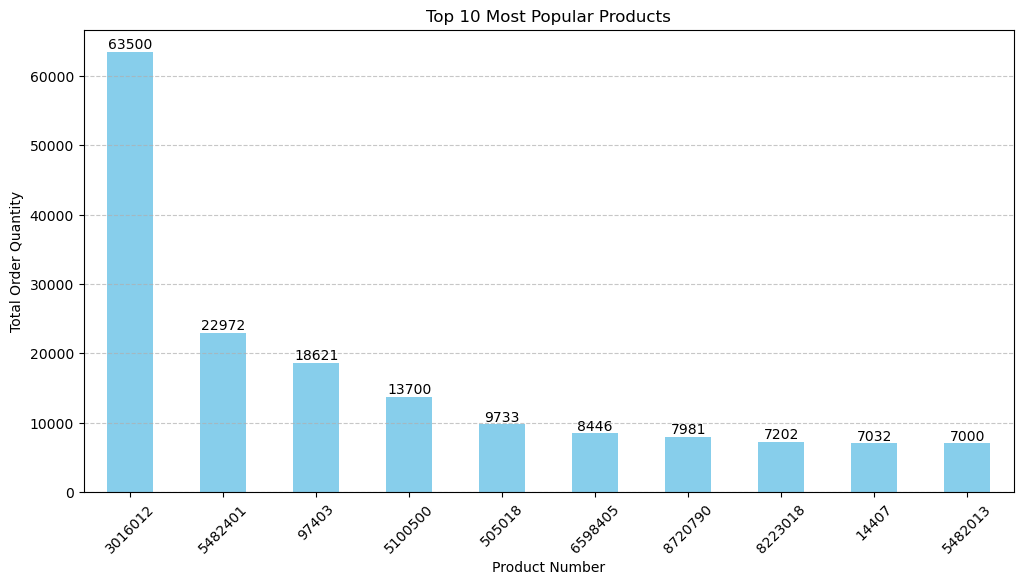

In [29]:
plt.figure(figsize=(12, 6))
ax = top_10_products.plot(kind='bar', color='skyblue')
plt.title("Top 10 Most Popular Products")
plt.xlabel("Product Number")
plt.ylabel("Total Order Quantity")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for bar in ax.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, 
             bar.get_height(), 
             f'{int(bar.get_height())}', 
             ha='center', 
             va='bottom')
plt.show()

### Which 3 clients have the most unfulfilled orders due to insufficient inventory?

In [30]:
unfulfilled_orders = order_data_2021_2023[order_data_2021_2023['FULFILLED'] == 0]
top_clients_unfulfilled = unfulfilled_orders.groupby("CUSTOMER_NUMBER").size()
top_clients_unfulfilled.sort_values(ascending=False).head(3)

CUSTOMER_NUMBER
22742000    324
8875900     289
15853000    241
dtype: int64

#### For these clients, how much money do these insufficient inventory orders account for?

In [31]:
top_clients = top_clients_unfulfilled.sort_values(ascending=False).head(3).index
top_clients_data = unfulfilled_orders[unfulfilled_orders['CUSTOMER_NUMBER'].isin(top_clients)]
amount_lost_by_top_clients = top_clients_data.groupby("CUSTOMER_NUMBER")['AMOUNT_LOST'].sum()
amount_lost_by_top_clients

CUSTOMER_NUMBER
8875900      87149.70
15853000    194249.94
22742000    293395.85
Name: AMOUNT_LOST, dtype: float64

### What observations can you make about orders placed between Jan through March of 2023 

#### Total vs unfulfilled orders

In [32]:
order_data_2021_2023["ENTRY_DATE"] = pd.to_datetime(order_data_2021_2023["ENTRY_DATE"])

orders_jan_march_2023 = order_data_2021_2023[(order_data_2021_2023['ENTRY_DATE'] >= '2023-01-01') & 
                                               (order_data_2021_2023['ENTRY_DATE'] <= '2023-03-31')]

total_orders_count = orders_jan_march_2023.shape[0]

unfulfilled_orders_count = orders_jan_march_2023[orders_jan_march_2023["FULFILLED"] == 0].shape[0]
fulfilled_orders_count = total_orders_count - unfulfilled_orders_count

total_orders_count, fulfilled_orders_count, unfulfilled_orders_count

(56208, 48725, 7483)

In [33]:
complete_orders = (fulfilled_orders_count/total_orders_count)*100
print("Complete (fulfilled) orders: ", complete_orders,"%")

Complete (fulfilled) orders:  86.68694847708511 %


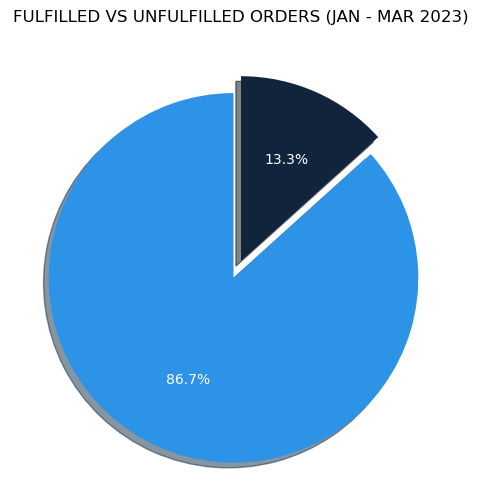

In [34]:
labels = ['Fulfilled Orders', 'Unfulfilled Orders']
sizes = [fulfilled_orders_count, unfulfilled_orders_count]
colors = ['#2c93e7', '#12243c']
explode = (0.1, 0) 

plt.figure(figsize=(6, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90,
        textprops={'color': 'white'})

plt.title("FULFILLED VS UNFULFILLED ORDERS (JAN - MAR 2023)")

plt.show()

#### Orders made by month betwwn January and March 2023

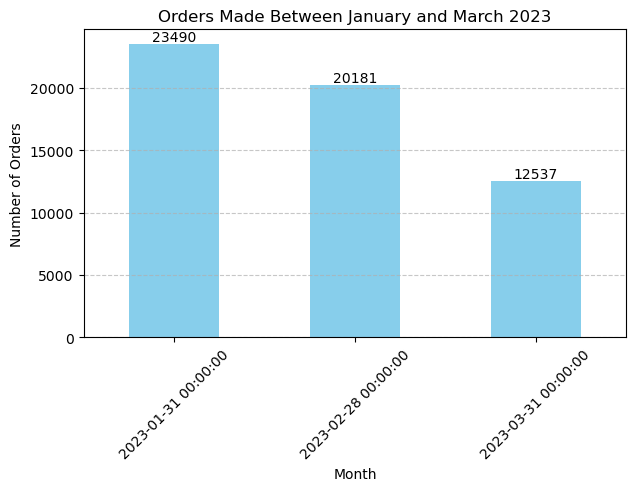

In [35]:
monthly_orders = orders_jan_march_2023.resample('M', on='ENTRY_DATE').size()

plt.figure(figsize=(7, 4))
monthly_orders.plot(kind='bar', color='skyblue')
plt.title("Orders Made Between January and March 2023")
plt.xlabel("Month")
plt.ylabel("Number of Orders")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for bar in plt.gca().patches:
    plt.text(bar.get_x() + bar.get_width() / 2, 
             bar.get_height(), 
             f'{int(bar.get_height())}', 
             ha='center', 
             va='bottom')

plt.show()


## 2. Objective 2

In [36]:
order_data_2021_2023.columns

Index(['ENTRY_DATE', 'DELIVERY_DATE', 'CUSTOMER_RANK', 'CUSTOMER_NUMBER',
       'HOSPITAL_LOCATION_ID', 'DELIVERY_WAREHOUSE', 'PRODUCT_NUMBER',
       'ORIGINAL_QUANTITY', 'ORDER_QUANTITY', 'DELIVERY_QUANTITY',
       'LINE_SEQUENCE', 'TRACKING_NUMBER', 'SERVICE_ORDER_NUMBER',
       'SERVICE_LEVEL_STATUS', 'ORDER_LINE_ITEM_TOTAL',
       'DELIVERY_LINE_ITEM_TOTAL', 'AMOUNT_LOST', 'UPDATE_FLAG', 'REGION',
       'AREA', 'DISTRICT', 'CLIENT_AREA', 'CLIENT_DISTRICT', 'REASON_CODE',
       'FULFILLED'],
      dtype='object')

#### Group orders by HOSPITAL_LOCATION_ID and PRODUCTS, calculating subsequent order and delivery quantities

In [37]:
order_data_2021_2023['ENTRY_DATE'] = pd.to_datetime(order_data_2021_2023['ENTRY_DATE'])
order_data_2021_2023['DELIVERY_DATE'] = pd.to_datetime(order_data_2021_2023['DELIVERY_DATE'])

results = []

for _, group in order_data_2021_2023.groupby(['HOSPITAL_LOCATION_ID', 'PRODUCT_NUMBER']):
    for index, row in group.iterrows():
        original_quantity = row['ORDER_QUANTITY']
        delivery_quantity = row['DELIVERY_QUANTITY']
       
        end_date = row['ENTRY_DATE'] + pd.Timedelta(days=60)
        
        
        subsequent_orders = group[(group['ENTRY_DATE'] > row['ENTRY_DATE']) & (group['ENTRY_DATE'] <= end_date)]
        
        for _, sub_row in subsequent_orders.iterrows():
            if sub_row['ORDER_QUANTITY'] >= original_quantity or sub_row['DELIVERY_QUANTITY'] >= delivery_quantity:
                results.append({
                    'HOSPITAL_LOCATION_ID': row['HOSPITAL_LOCATION_ID'],
                    'PRODUCT_NUMBER': row['PRODUCT_NUMBER'],
                    'SUBSEQUENT_ORDER_QUANTITY': sub_row['ORDER_QUANTITY'],
                    'SUBSEQUENT_DELIVERY_QUANTITY': sub_row['DELIVERY_QUANTITY'],
                    'ORIGINAL_ORDER_QUANTITY': original_quantity,
                    'ORIGINAL_DELIVERY_QUANTITY': delivery_quantity,
                    'ENTRY_DATE': row['ENTRY_DATE'],
                    'SUBSEQUENT_ORDER_DATE': sub_row['ENTRY_DATE']
                })

result_by_hospital_id = pd.DataFrame(results)

In [38]:
result_by_hospital_id.head(20)

,HOSPITAL_LOCATION_ID,PRODUCT_NUMBER,SUBSEQUENT_ORDER_QUANTITY,SUBSEQUENT_DELIVERY_QUANTITY,ORIGINAL_ORDER_QUANTITY,ORIGINAL_DELIVERY_QUANTITY,ENTRY_DATE,SUBSEQUENT_ORDER_DATE
0,14.0,3029395,40,40,40,40,2022-12-07,2023-01-10
1,380.0,4226404,1,1,1,1,2023-01-05,2023-02-07
2,380.0,4907400,10,0,5,5,2023-01-05,2023-03-02
3,380.0,4907400,10,0,2,2,2023-02-07,2023-03-02
4,380.0,5480405,1,1,1,1,2023-01-05,2023-02-07
5,380.0,5482401,6,6,8,0,2023-02-07,2023-03-02
6,380.0,5488409,2,2,3,0,2023-02-07,2023-02-16
7,380.0,5488409,2,0,3,0,2023-02-07,2023-03-02
8,380.0,5488409,2,0,2,2,2023-02-16,2023-03-02
9,380.0,6179403,2,2,2,2,2023-01-05,2023-02-07


In [39]:
result_by_hospital_id.shape

(7213, 8)

### Have the same products been ordered by the same hospital with same qty or higher than what was lost in the ensuing 60 days of the original order? 

#### Calculate cases in which there was lost of quantities, comparing ORIGINAL_ORDER_QUANTITY and ORIGINAL_DELIVERY_QUANTITY

In [40]:
result_by_hospital_id['LOST_QUANTITY'] = result_by_hospital_id['ORIGINAL_ORDER_QUANTITY'] - result_by_hospital_id['ORIGINAL_DELIVERY_QUANTITY']
total_lost_cases = result_by_hospital_id[result_by_hospital_id['LOST_QUANTITY'] > 0].shape[0]

#### Calculate days between orders

In [41]:
result_by_hospital_id['DAYS_BETWEEN_ORDERS'] = (result_by_hospital_id['SUBSEQUENT_ORDER_DATE'] - result_by_hospital_id['ENTRY_DATE']).dt.days

#### See which orders met or exceed the lost order quantities in a range of 60 days

In [42]:
met_or_exceeded_reorders = result_by_hospital_id[(result_by_hospital_id['SUBSEQUENT_ORDER_QUANTITY'] >= result_by_hospital_id['LOST_QUANTITY']) & 
                     (result_by_hospital_id['DAYS_BETWEEN_ORDERS'] <= 60) & 
                     (result_by_hospital_id['LOST_QUANTITY'] > 0)]

met_or_exceeded_reorders

,HOSPITAL_LOCATION_ID,PRODUCT_NUMBER,SUBSEQUENT_ORDER_QUANTITY,SUBSEQUENT_DELIVERY_QUANTITY,ORIGINAL_ORDER_QUANTITY,ORIGINAL_DELIVERY_QUANTITY,ENTRY_DATE,SUBSEQUENT_ORDER_DATE,LOST_QUANTITY,DAYS_BETWEEN_ORDERS
13,380.0,8717714,3,3,3,0,2023-02-07,2023-02-16,3,9
18,2780.0,6979407,3,3,3,0,2023-01-06,2023-01-19,3,13
20,3582.0,4907400,4,4,3,0,2023-02-27,2023-02-28,3,1
21,3582.0,5307401,15,0,15,0,2022-12-08,2023-01-11,15,34
22,3582.0,5307401,10,0,10,0,2023-02-27,2023-02-28,10,1
...,...,...,...,...,...,...,...,...,...,...
7011,99999.0,8227010,12,12,12,0,2023-02-15,2023-02-22,12,7
7013,99999.0,8227010,12,12,12,0,2023-02-15,2023-02-27,12,12
7088,99999.0,8232019,20,20,20,0,2023-02-23,2023-02-28,20,5
7089,99999.0,8234015,12,12,12,0,2023-02-23,2023-02-28,12,5


#### Calculate percentage of reorders that met or exceeded lost quantity

In [43]:
met_or_exceeded_reorders_quantity = met_or_exceeded_reorders.shape[0]
percentage_met_or_exceeded = (met_or_exceeded_reorders_quantity / total_lost_cases) * 100

print("Percentage of reorders that met or exceeded lost quantity:", percentage_met_or_exceeded,"%")

Percentage of reorders that met or exceeded lost quantity: 77.40336967294351 %


#### Save the results by hospital ID

In [44]:
result_by_hospital_id.to_csv('./subsequent_orders_by_hospital_id.csv', index=False)
met_or_exceeded_reorders.to_csv('./orders_met_or_exceeded_by_hospital_id.csv', index=False)

## 3. Bonus: predicting next month's outcome

In [45]:
order_data_2021_2023.head()

,ENTRY_DATE,DELIVERY_DATE,CUSTOMER_RANK,CUSTOMER_NUMBER,HOSPITAL_LOCATION_ID,DELIVERY_WAREHOUSE,PRODUCT_NUMBER,ORIGINAL_QUANTITY,ORDER_QUANTITY,DELIVERY_QUANTITY,...,DELIVERY_LINE_ITEM_TOTAL,AMOUNT_LOST,UPDATE_FLAG,REGION,AREA,DISTRICT,CLIENT_AREA,CLIENT_DISTRICT,REASON_CODE,FULFILLED
0,2022-11-17,2023-03-23,G,881900,56245,305,319195,2,2,2,...,125.60,0.00,C,X-Medical Operations Europe,X11-N. Europe,739-Holland,K50-Germany & East Europe,489-East Europe,,1
1,2022-11-17,2023-03-23,G,881900,56245,305,367012,3,2,2,...,612.31,306.15,C,X-Medical Operations Europe,X11-N. Europe,739-Holland,K50-Germany & East Europe,489-East Europe,64-Customer change to product or QTY,1
2,2022-11-17,2023-03-23,G,881900,56245,305,373019,1,1,1,...,295.77,0.00,C,X-Medical Operations Europe,X11-N. Europe,739-Holland,K50-Germany & East Europe,489-East Europe,,1
256,2022-12-08,2023-03-27,G,2375900,41081,393,24406,1,1,1,...,35.75,0.00,C,X-Medical Operations Europe,X10-S. Europe,789-Spain,K50-Germany & East Europe,490-Germany,,1
257,2022-12-08,2023-03-27,G,2375900,41081,393,48406,2,2,2,...,142.50,0.00,C,X-Medical Operations Europe,X10-S. Europe,789-Spain,K50-Germany & East Europe,490-Germany,,1


* I started by converting the Year_Month column to datetime format
* I took the columns for order quantity, delivery_quantity, and delivery_line_item_total and put the cumulative values per month

In [46]:
order_data_2021_2023_pred = order_data_2021_2023.dropna(subset=['ENTRY_DATE', 'DELIVERY_DATE'])

order_data_2021_2023_pred['Year_Month'] = order_data_2021_2023_pred['ENTRY_DATE'].dt.to_period('M')

monthly_data = order_data_2021_2023_pred.groupby('Year_Month').agg({
    'ORDER_QUANTITY': 'sum',
    'DELIVERY_QUANTITY': 'sum',
    'DELIVERY_LINE_ITEM_TOTAL': 'sum'
}).rename(columns={
    'ORDER_QUANTITY': 'Total_Order_Quantity',
    'DELIVERY_QUANTITY': 'Total_Delivery_Quantity',
    'DELIVERY_LINE_ITEM_TOTAL': 'Total_Sales_Revenue'
}).reset_index()

monthly_data['Year_Month'] = monthly_data['Year_Month'].dt.to_timestamp()


In [47]:
monthly_data

,Year_Month,Total_Order_Quantity,Total_Delivery_Quantity,Total_Sales_Revenue
0,2021-01-01,61,44,109022.00
1,2021-03-01,12,12,3502.00
2,2021-07-01,8,2,3096.30
3,2021-09-01,452,411,106227.81
4,2021-10-01,6,6,360.00
5,2022-01-01,1,1,1800.00
6,2022-02-01,14,14,1203.32
7,2022-03-01,4,4,42018.93
8,2022-04-01,331,233,43567.35
9,2022-05-01,391,326,65410.79


In [48]:
monthly_data['Month'] = monthly_data['Year_Month'].dt.month.astype('category')
monthly_data.head()

,Year_Month,Total_Order_Quantity,Total_Delivery_Quantity,Total_Sales_Revenue,Month
0,2021-01-01,61,44,109022.00,1
1,2021-03-01,12,12,3502.00,3
2,2021-07-01,8,2,3096.30,7
3,2021-09-01,452,411,106227.81,9
4,2021-10-01,6,6,360.00,10


With the aid of Claude.AI, I used two approaches:

* Trend-based and Moving Average-based forecasting:

    - Trend-based:  uses linear regression model to capture the trend in the data. The create_trend_forecast() function fits a linear model on the Days_From_Start feature and the target metric (Total_Order_Quantity, Total_Delivery_Quantity, Total_Sales_Revenue). It then predicts the value for the next month.

    - Moving Average-based: This calculates the average of the last 6 months of data for each metric using the calculate_moving_average() function. This provides a forecast based on the recent historical patterns.


* In the analyze_and_forecast() function, the Mean Absolute Percentage Error (MAPE) is calculated for the trend-based forecasts. This provides a measure of the forecast accuracy, which can be useful for assessing the reliability of the predictions.

* The percent change between the current value and the forecasted value for both the trend-based and moving average methods is also calculated. In this case, it  gives an indication of growth.

In [49]:
def format_data(df):
    df['Date'] = pd.to_datetime(df['Year_Month'])
    df['Days_From_Start'] = (df['Date'] - df['Date'].min()).dt.days
    return df

def create_trend_forecast(data, target_column, periods=1):
    # Prepare X (features) and y (target)
    X = data[['Days_From_Start']].values
    y = data[target_column].values
    
    # Fit linear regression model
    model = LinearRegression()
    model.fit(X, y)
    
    # Calculate next time point
    last_date = data['Date'].max()
    next_date = last_date + pd.DateOffset(months=periods)
    days_from_start = (next_date - data['Date'].min()).days
    
    # Make prediction
    forecast = model.predict([[days_from_start]])
    
    # Calculate error metrics on the last 3 points
    if len(data) > 3:
        y_test = y[-3:]
        y_pred = model.predict(X[-3:])
        mape = mean_absolute_percentage_error(y_test, y_pred)
    else:
        mape = None
    
    return max(0, forecast[0]), mape  # Ensure non-negative predictions

def calculate_moving_average(data, target_column, window=6):
    return data[target_column].tail(window).mean()

def analyze_and_forecast(df):
    df_prepared = format_data(df)
    
    results = {}
    metrics = ['Total_Order_Quantity', 'Total_Delivery_Quantity', 'Total_Sales_Revenue']
    
    for metric in metrics:
        # Get trend-based forecast
        trend_forecast, mape = create_trend_forecast(df_prepared, metric)
        
        # Calculate moving average
        ma_forecast = calculate_moving_average(df_prepared, metric, window=6)
        
        # Store results
        results[metric] = {
            'trend_forecast': trend_forecast,
            'ma_forecast': ma_forecast,
            'mape': mape if mape else 'N/A',
            'last_value': df_prepared[metric].iloc[-1],
            'percent_change_trend': ((trend_forecast - df_prepared[metric].iloc[-1]) / 
                                   df_prepared[metric].iloc[-1] * 100),
            'percent_change_ma': ((ma_forecast - df_prepared[metric].iloc[-1]) / 
                                df_prepared[metric].iloc[-1] * 100)
        }
    
    return results, df_prepared

# Generate forecasts
forecasts, prepared_data = analyze_and_forecast(monthly_data)

# Print results
print("\nForecast Results:")
print("-" * 50)
for metric, results in forecasts.items():
    print(f"\n{metric}:")
    print(f"Current value: {results['last_value']:,.2f}")
    print(f"Trend-based forecast: {results['trend_forecast']:,.2f}")
    print(f"Moving average forecast: {results['ma_forecast']:,.2f}")
    print(f"Trend percent change: {results['percent_change_trend']:,.2f}%")
    print(f"MA percent change: {results['percent_change_ma']:,.2f}%")
    if results['mape'] != 'N/A':
        print(f"Model MAPE: {results['mape']*100:.2f}%")
    print("-" * 30)


Forecast Results:
--------------------------------------------------

Total_Order_Quantity:
Current value: 47,377.00
Trend-based forecast: 51,441.20
Moving average forecast: 57,562.00
Trend percent change: 8.58%
MA percent change: 21.50%
Model MAPE: 42.03%
------------------------------

Total_Delivery_Quantity:
Current value: 42,936.00
Trend-based forecast: 45,932.76
Moving average forecast: 51,458.67
Trend percent change: 6.98%
MA percent change: 19.85%
Model MAPE: 40.92%
------------------------------

Total_Sales_Revenue:
Current value: 6,314,836.95
Trend-based forecast: 5,161,668.00
Moving average forecast: 5,836,116.54
Trend percent change: -18.26%
MA percent change: -7.58%
Model MAPE: 48.13%
------------------------------


The plot_time_series_forecast() function creates a visualization that includes three subplots, one for each of the key metrics:

- Total Order Quantity
- Total Delivery Quantity
- Total Sales Revenue

For each metric, the plot shows:

- The historical data (blue line with dots)
- The trend-based forecast (red dashed line)
- The moving average forecast (green dashed line)


/var/folders/4z/_zp620rd3w915xf6z_j1jql80000gn/T/ipykernel_16065/2595875640.py:81: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


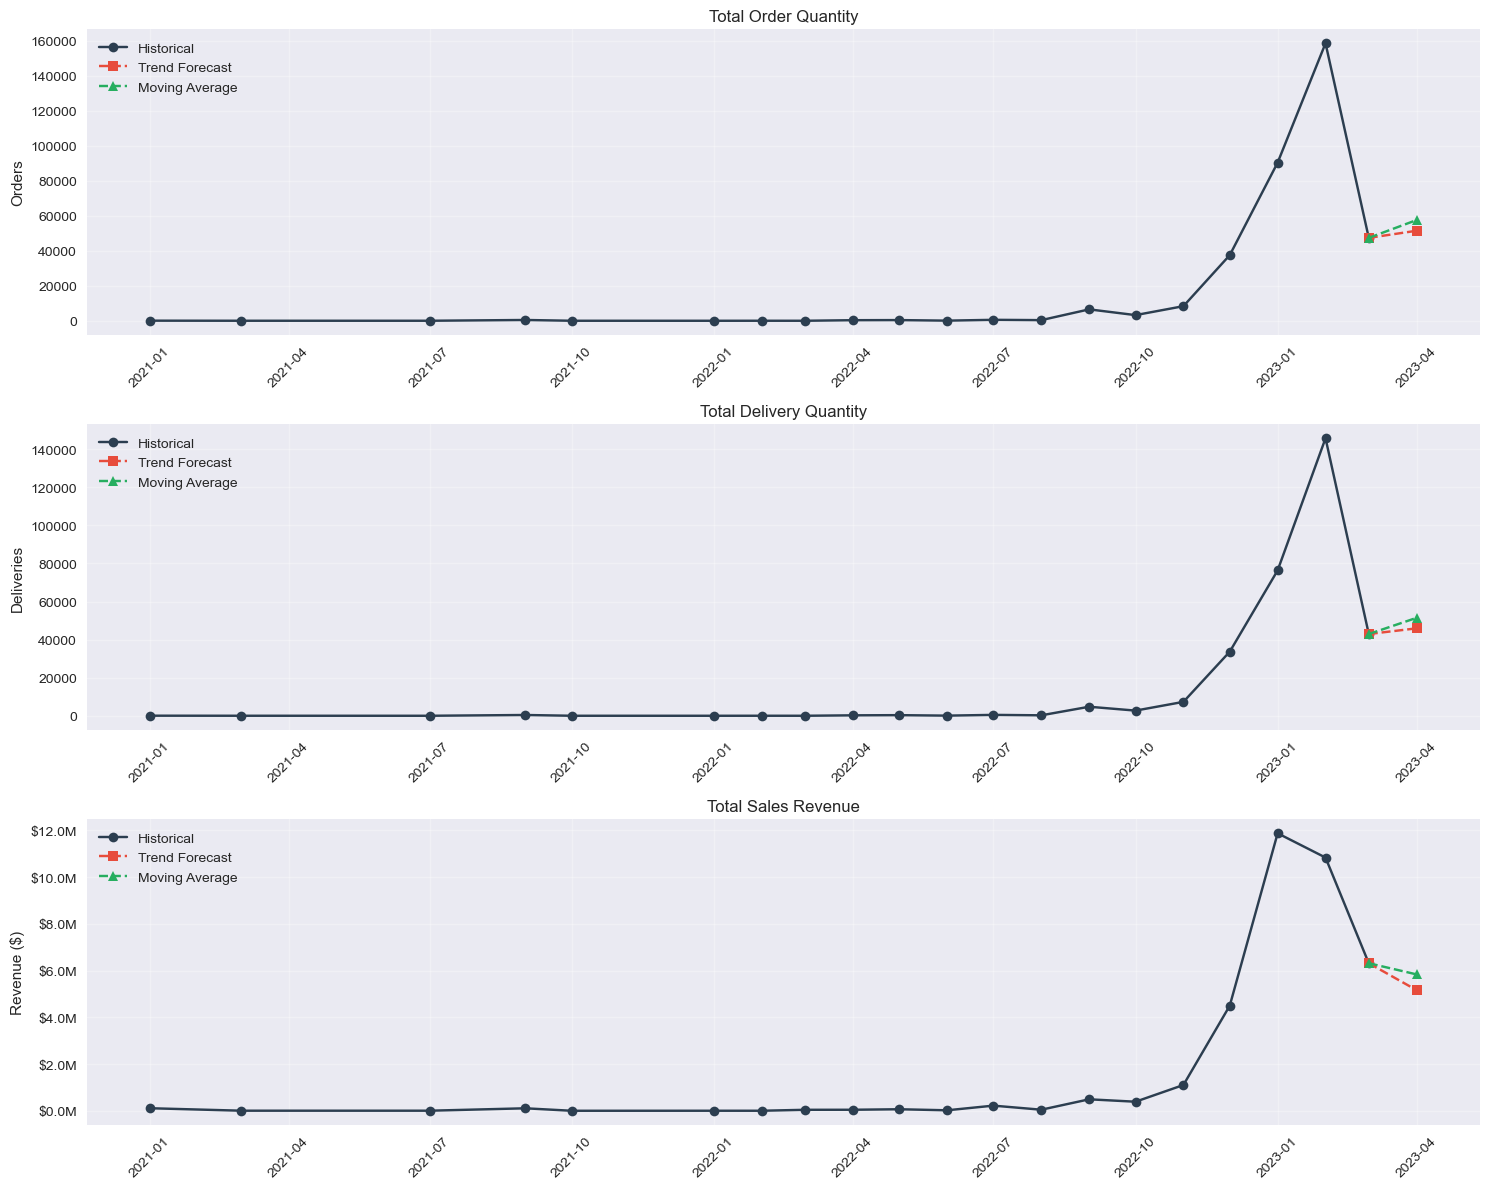


Forecast Summary for Next Month:
--------------------------------------------------

Total_Order_Quantity:
Trend Forecast: 51,441.20
Moving Average Forecast: 57,562.00
Current Value: 47,377.00
Trend % Change: 8.58%

Total_Delivery_Quantity:
Trend Forecast: 45,932.76
Moving Average Forecast: 51,458.67
Current Value: 42,936.00
Trend % Change: 6.98%

Total_Sales_Revenue:
Trend Forecast: 5,161,668.00
Moving Average Forecast: 5,836,116.54
Current Value: 6,314,836.95
Trend % Change: -18.26%


In [50]:
def plot_time_series_forecast(df, forecasts):
    """
    Create a comprehensive visualization of the time series data and forecasts
    """
    # Set up the figure and axes with three subplots
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(15, 12))
    #fig.suptitle('Sales Metrics Over Time with Forecasts', fontsize=16, y=0.95)
    
    # Convert dates to datetime if they aren't already
    df['Date'] = pd.to_datetime(df['Year_Month'])
    
    # Calculate forecast point (one month after last date)
    last_date = df['Date'].max()
    forecast_date = last_date + pd.DateOffset(months=1)
    
    # Colors
    historical_color = '#2C3E50'
    forecast_color = '#E74C3C'
    ma_color = '#27AE60'
    
    # Plot Order Quantity
    ax1.plot(df['Date'], df['Total_Order_Quantity'], 
            color=historical_color, marker='o', label='Historical')
    ax1.plot([last_date, forecast_date], 
            [df['Total_Order_Quantity'].iloc[-1], forecasts['Total_Order_Quantity']['trend_forecast']], 
            color=forecast_color, linestyle='--', marker='s', label='Trend Forecast')
    ax1.plot([last_date, forecast_date], 
            [df['Total_Order_Quantity'].iloc[-1], forecasts['Total_Order_Quantity']['ma_forecast']], 
            color=ma_color, linestyle='--', marker='^', label='Moving Average')
    ax1.set_title('Total Order Quantity')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    ax1.set_ylabel('Orders')
    
    # Plot Delivery Quantity
    ax2.plot(df['Date'], df['Total_Delivery_Quantity'], 
            color=historical_color, marker='o', label='Historical')
    ax2.plot([last_date, forecast_date], 
            [df['Total_Delivery_Quantity'].iloc[-1], forecasts['Total_Delivery_Quantity']['trend_forecast']], 
            color=forecast_color, linestyle='--', marker='s', label='Trend Forecast')
    ax2.plot([last_date, forecast_date], 
            [df['Total_Delivery_Quantity'].iloc[-1], forecasts['Total_Delivery_Quantity']['ma_forecast']], 
            color=ma_color, linestyle='--', marker='^', label='Moving Average')
    ax2.set_title('Total Delivery Quantity')
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    ax2.set_ylabel('Deliveries')
    
    # Plot Sales Revenue
    ax3.plot(df['Date'], df['Total_Sales_Revenue'], 
            color=historical_color, marker='o', label='Historical')
    ax3.plot([last_date, forecast_date], 
            [df['Total_Sales_Revenue'].iloc[-1], forecasts['Total_Sales_Revenue']['trend_forecast']], 
            color=forecast_color, linestyle='--', marker='s', label='Trend Forecast')
    ax3.plot([last_date, forecast_date], 
            [df['Total_Sales_Revenue'].iloc[-1], forecasts['Total_Sales_Revenue']['ma_forecast']], 
            color=ma_color, linestyle='--', marker='^', label='Moving Average')
    ax3.set_title('Total Sales Revenue')
    ax3.legend()
    ax3.grid(True, alpha=0.3)
    ax3.set_ylabel('Revenue ($)')
    
    # Format y-axis for revenue to show millions
    ax3.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1e6:.1f}M'))
    
    # Rotate x-axis labels for better readability
    for ax in [ax1, ax2, ax3]:
        ax.tick_params(axis='x', rotation=45)
    
    # Adjust layout to prevent overlap
    plt.tight_layout()
    
    return fig

# Using the same data from before

# Generate forecasts using the previous function
forecasts, prepared_data = analyze_and_forecast(monthly_data)

# Create and display the plot
plt.style.use('seaborn')
fig = plot_time_series_forecast(monthly_data, forecasts)
plt.show()

# Print forecast values
print("\nForecast Summary for Next Month:")
print("-" * 50)
for metric, results in forecasts.items():
    print(f"\n{metric}:")
    print(f"Trend Forecast: {results['trend_forecast']:,.2f}")
    print(f"Moving Average Forecast: {results['ma_forecast']:,.2f}")
    print(f"Current Value: {results['last_value']:,.2f}")
    print(f"Trend % Change: {results['percent_change_trend']:,.2f}%")